In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### ***Importing the Dataset***

In [2]:
df = pd.read_csv('resources/startup_funding.csv')

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


### ***Dropping the Remark column and setting the Index column***

In [3]:
df.drop(columns = ['Remarks'],inplace = True)
df.set_index('Sr No', inplace=True)

### ***Renaming the columns***

In [4]:
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup',
    'Industry Vertical': 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'city',
    'Investors Name': 'investors',
    'InvestmentnType': 'round',
    'Amount in USD': 'amount'
}, inplace=True)

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


### ***Stripping and Replacing***

In [5]:
df.amount = df.amount.str.lstrip('\\xc2\\xa0')
df.amount = df.amount.str.replace('N/A', '0')
df.amount = df.amount.str.replace(',', '')
df.amount = df.amount.str.replace('unknown', '0')
df.amount = df.amount.str.replace('undisclosed', '0')
df.amount = df.amount.str.replace('Undisclosed', '0')
df.amount = df.amount.str.rstrip('+')

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


### ***Typecasting the amount values to float64***

In [6]:
df.amount = df.amount.astype(float)

df.amount.dtype

dtype('float64')

### ***Cleaning Startups column***

In [7]:
df.startup = df.startup.str.replace("http://", '')
df.startup = df.startup.str.replace(".in", '')
df.startup = df.startup.str.replace(".com", '')

df.startup = df.startup.str.strip("\\xe2\\x80\\x99")
df.startup = df.startup.str.strip('"')
df.startup = df.startup.str.replace('\\', '')

df[df['startup'].str.contains("Rapido")]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
504,21/11/2017,Rapido,Technology,Bike and Taxi pooling online platform,Hyderabad,"Skycatcher Fund, Aravind Sanka",Seed/Angel Funding,3.292300e+05
622,25/09/2017,Rapido,Consumer Internet,Bike Aggregator Mobile App,Bangalore,Battery Road Digital Holdings LLC,Seed Funding,4.220000e+05
1781,18/04/2016,Rapido,Consumer Internet,Bike Aggregator App,Bangalore,"Pawan Munjal, AdvantEdge Partners, Astarc Vent...",Private Equity,NaN


### ***Normalized Conversion to Rupees***

In [8]:
def to_inr(dollar):
    inr = dollar * 83.17
    return inr/10000000

df['amount'] = df['amount'].apply(to_inr)

df.iloc[2604:2610, :]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
2605,09/07/2015,c2xa0Shopsity,\\xc2\\xa0Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,0.000000
2606,09/07/2015,c2xa0Notesgen,\\xc2\\xa0Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,0.000000
2607,\\xc2\\xa010/7/2015,c2xa0Infinity Assuranc,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,4.990200
2608,10/07/2015,c2xa0Footprints Education,\\xc2\\xa0Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,5.697145
2609,10/07/2015,c2xa0Loylty Rewards,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,NaN,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,160.933950
2610,13/07/2015,c2xa0Ameyo,\\xc2\\xa0Contact Center Software Platform,NaN,\\xc2\\xa0Gurgaon,\\xc2\\xa0Forum Synergies PE Fund,Private Equity,41.585000


### ***Stripping the columns startup, vertical, city, investors and date***

In [9]:
def colstrip(df, cols):
    for col in cols:
        df[col] = df[col].str.lstrip('\\xc2\\xa0')
        
colstrip(df, ['startup', 'vertical', 'city', 'investors'])

df.investors = df.investors.str.replace('\\', '')

df.at[4, 'startup'] = 'Wealth Bucket'

# x = df[df.date.str.contains("2017")]
# x[x.investors.str.contains("Kedaraa").values == True]

df.at[465, 'investors'] = df.at[465, 'investors'].strip('"')
df.at[465, 'investors'] = df.at[465, 'investors'][:-1]
df.at[465, 'investors']

'Kedaraa Capital, Ontario Teachers'

### ***Fixing the 'dates' column*** using **Excel**

In [10]:
df.date = df.date.str.lstrip('\\xc2\\xa0')

dt = [193, 2572, 2776, 2777, 2832, 3012, 3030]

df.at[dt[0], 'date'] = '5/07/2018'
df.at[dt[1], 'date'] = '1/07/2015'

for i in range(2, 6):
    df.at[dt[i], 'date'] = df.at[dt[i], 'date'].replace('.', '/')

df.at[dt[6], 'date'] = '22' + df.at[dt[6], 'date']
df.at[dt[6], 'date'] = df.at[dt[6], 'date'].replace('//', '/')

df.date = pd.to_datetime(df.date, format='mixed')

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600


### Getting the _month_ and _year_

In [11]:
df['month'] = pd.to_datetime(df.date).dt.month
df['year'] = pd.to_datetime(df.date).dt.year

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000,9,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493,1,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639,9,2020
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000,1,2020
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600,1,2020


#### Determining the NaN ***value counts*** in all the columns

In [12]:
result = df.apply(lambda x: x.isna().value_counts())
result

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
False,3044.0,3044.0,2873,2108,2864,3020,3040,2084,3044.0,3044.0
True,NaN,NaN,171,936,180,24,4,960,NaN,NaN


### Removing the NaN values

In [13]:
# rem = [col for col in result.columns if result[col].iloc[1].dtype != np.float64]
# df = df.dropna(subset=rem)

df = df.dropna(subset=['date', 'startup', 'vertical',
               'city', 'investors', 'round', 'amount'])

df

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000,9,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.938493,1,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.690639,9,2020
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.951000,1,2020
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.970600,1,2020
...,...,...,...,...,...,...,...,...,...,...
2868,2015-09-04,Icertis,Cloud Enterprise Software,NaN,Pune / US,"Greycroft Partners, Fidelity Growth Partners",Private Equity,49.902000,9,2015
2869,2015-09-04,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,29.109500,9,2015
2871,2015-09-04,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.326800,9,2015


### Finding Investors

In [14]:
investors = sorted(set(df['investors'].str.split(',').sum()))

print(f"Number of investors = {len(investors)}")

Number of investors = 2461


### Finding ***Investor Details*** , example - _IDG Ventures_

In [15]:
idgv = df[df['investors'].str.contains('IDG Ventures')]

idgv.head()[['date', 'startup', 'vertical', 'city', 'round', 'amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.869466
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,998.040000
259,2018-05-01,Bizongo,Consumer Internet,Mumbai,Private Equity,16.634000
310,2018-06-04,POPxo,Technology,Delhi,Private Equity,45.743500
439,2017-07-12,Shakti,Ecommerce,Chennai,Debt Funding,2.495100


In [16]:
idgv.groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit                 998.040000
Lenskart                 499.020000
Curefit                  124.755000
Fintelli                 124.755000
Xpressbees               103.962500
FirstCry                  83.170000
POPxo                     71.526200
Uniphor                   56.555600
CloudCherry               49.902000
HealthifyM                49.902000
Sigtupl                   48.238600
Flyrob                    44.080100
RentMojo                  41.585000
Aasaanjobs                41.585000
CureFit                   41.585000
Bizongo                   41.585000
Vayana                    33.268000
Agrostar                  33.268000
PlaySimpl                 33.268000
Blowhorn                  30.357050
Tripoto                   29.869466
Active.ai                 24.951000
mPaani                    11.227950
Hansel.io                 11.227950
Little Black Book          8.317000
Pluss                      8.317000
Hevo Data                  8.317000
Cloudcherry Analytic

#### Sectors of investment

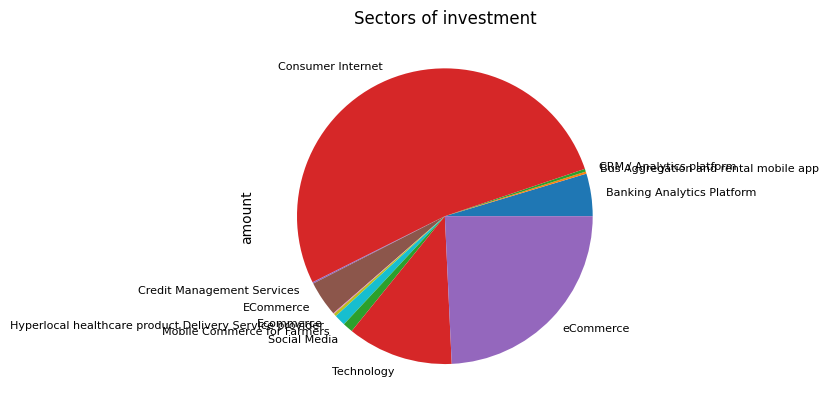

In [17]:
idgv.groupby('vertical')['amount'].sum().plot(kind='pie', fontsize=8)

plt.title('Sectors of investment')
plt.show()

#### Stages of Investment

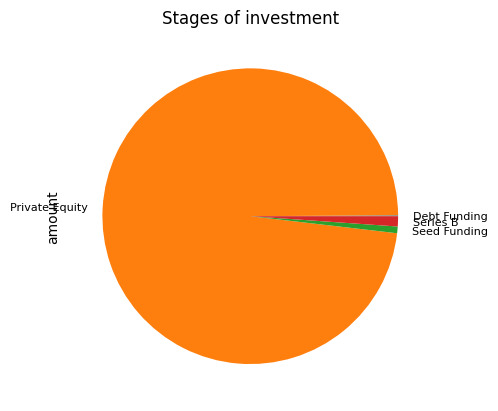

In [18]:
idgv.groupby('round')['amount'].sum().plot(kind='pie', fontsize=8)

plt.title('Stages of investment')
plt.show()

### Amoount invested per _city_

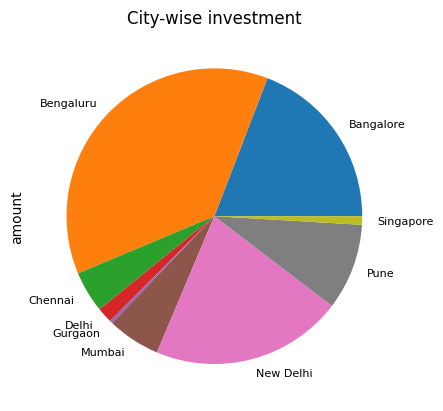

In [19]:
idgv.groupby('city')['amount'].sum().plot(kind='pie', fontsize=8)

plt.title('City-wise investment')
plt.show()

### Amount invested by _year_

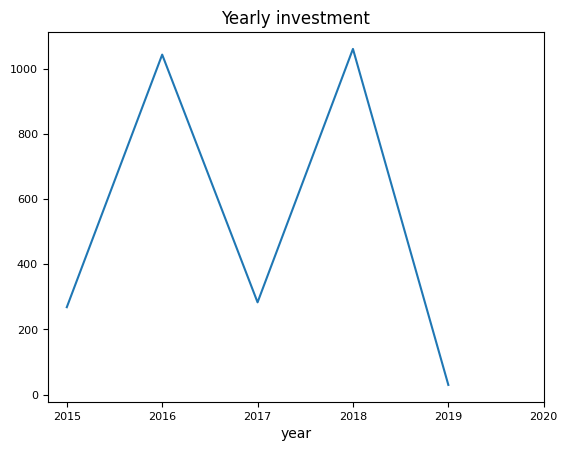

In [20]:
df['year'] = df['year'].astype(int)
ax = idgv.groupby('year')['amount'].sum().plot(fontsize=8)

ax.set_xticks(df['year'].unique())

plt.title('Yearly investment')
plt.show()

## **General Analysis**

### _Amount invested in Indian startups_

In [21]:
print(f"Maximum amount invested = {df.amount.max()}")
df['startup'].nunique()

Maximum amount invested = 32436.3


1573

In [22]:
mean = df.groupby('startup')['amount'].sum().mean()

df['month'] = pd.to_datetime(df.date).dt.month_name()

### Year and Month-wise **number of fundings**

In [23]:
df.groupby(['year', 'month'])['startup'].count().reset_index()

,year,month,startup
0,2015,April,50
1,2015,August,57
2,2015,December,28
3,2015,January,37
4,2015,July,60
...,...,...,...
57,2019,October,11
58,2019,September,1
59,2020,January,4
60,2020,October,1


#### Making the axis-labels

In [24]:
temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()

for i in range(temp_df.shape[0]):
    temp_df.at[i, 'time'] = f"{temp_df.at[i, 'month'][:3]} '{temp_df.at[i, 'year'] - 2000}"

temp_df.tail()

,year,month,amount,time
57,2019,October,6492.933691,Oct '19
58,2019,September,8.317000,Sep '19
59,2020,January,181.713093,Jan '20
60,2020,October,1247.550000,Oct '20
61,2020,September,152.690639,Sep '20


In [25]:
temp_df.drop(columns=['year', 'month'], inplace=True)
temp_df.set_index('time', inplace=True)

temp_df

,amount
time,
Apr '15,3823.724116
Aug '15,12839.543407
Dec '15,1172.364320
Jan '15,5728.416920
Jul '15,4889.098548
...,...
Oct '19,6492.933691
Sep '19,8.317000
Jan '20,181.713093


### ___Tests___

#### _Overall Analysis Metrics_

In [26]:
sdf = df.groupby('startup').amount

total = round(df.amount.sum() / 100000)

max = round(sdf.max().sort_values(ascending=False).head(1).values[0] / 10000)

mean = round(sdf.sum().mean() / 100)

print(f"Overall Analysis metrics :\nTotal amount invested = {total}Cr\nMaximum Funding = {max}Cr\nAverage Funding = {mean}Cr")

Overall Analysis metrics :
Total amount invested = 2Cr
Maximum Funding = 3Cr
Average Funding = 2Cr


#### _Month on Month **Graphs**_

##### 1. Total Investment

In [27]:
tdf = df.groupby(['year', 'month'])['amount'].sum().reset_index()
tdf.amount = tdf.amount / 10000
tdf.rename(columns={'amount': 'Amount (in Cr.)'}, inplace=True)
for i in range(tdf.shape[0]):
    tdf.at[i,
           'Month'] = f"{tdf.at[i, 'month'][:3]} '{tdf.at[i, 'year'] - 2000}"
tdf.drop(columns=['year', 'month'], inplace=True)

tdf

,Amount (in Cr.),Month
0,0.382372,Apr '15
1,1.283954,Aug '15
2,0.117236,Dec '15
3,0.572842,Jan '15
4,0.488910,Jul '15
...,...,...
57,0.649293,Oct '19
58,0.000832,Sep '19
59,0.018171,Jan '20
60,0.124755,Oct '20


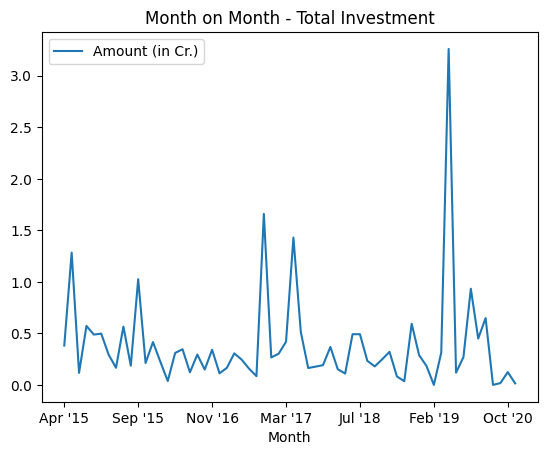

In [28]:
tdf.plot(y='Amount (in Cr.)', x='Month')
plt.title('Month on Month - Total Investment')
plt.show()

#### 2. Investment Count

In [29]:
tdf2 = df.groupby(['year', 'month'])['amount'].count().reset_index()
tdf2.rename(columns={'amount': 'No. of Investments'}, inplace=True)
for i in range(tdf2.shape[0]):
    tdf2.at[i,
            'Month'] = f"{tdf2.at[i, 'month'][:3]} '{tdf2.at[i, 'year'] - 2000}"
tdf2.drop(columns=['year', 'month'], inplace=True)

tdf2

,No. of Investments,Month
0,50,Apr '15
1,57,Aug '15
2,28,Dec '15
3,37,Jan '15
4,60,Jul '15
...,...,...
57,11,Oct '19
58,1,Sep '19
59,4,Jan '20
60,1,Oct '20


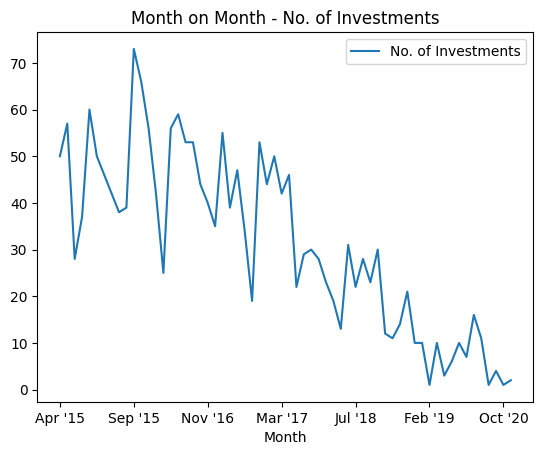

In [30]:
tdf2.plot(x='Month', y='No. of Investments')
plt.title('Month on Month - No. of Investments')
plt.show()

#### 3. Top 5 Sectors

In [31]:
category = df.groupby('vertical')[['vertical', 'amount']].head(5)
category.set_index('vertical', inplace = True)
fig6 = px.pie(
    labels=category.head().values,
    names= category.head().index,
    height=400,
    width=600,
    color_discrete_sequence=px.colors.sequential.dense_r,
    hole=0.4)
fig6

##### 4. Top 5 Startups by _year_

In [32]:
top5 = df.groupby(['startup', 'year', 'month'])['amount'].sum().reset_index()
top5.set_index('startup', inplace=True)
top5.query("year == 2020")[['month', 'amount']]

,month,amount
startup,,
BYJU’S,September,0.000000
Fashor,January,14.970600
Mamaearth,September,152.690639
Pando,January,74.853000
Shuttl,January,66.938493
Wealth Bucket,January,24.951000
Zomato,October,1247.550000


#### 5. Top 5 Investors

In [33]:
top5 = df.groupby(['investors', 'year', 'month'])['amount'].sum().reset_index()

top5[top5.investors.str.contains('Kedaraa')]

,investors,year,month,amount
819,"Kedaraa Capital, Ontario Teachers",2017,December,162.1815


### ***Cleaned CSV***

In [34]:
df.to_csv('resources/startup_cleaned.csv',index=False)  